In [3]:
# Add relevant Jupyter notebook extensions 

from control import Controller
from dynamic import Submarine, ClosedLoop, Mission
from terrain import generate_reference_and_limits

In [6]:
# You can double-check your Python path like this...
import sys  
print(sys.path)

['C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\python311.zip', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\DLLs', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0\\Lib', 'C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_3.11.2544.0_x64__qbz5n2kfra8p0', 'c:\\Users\\User\\Documents\\[1] MEng Oxford Course\\[00] Third Year\\B1\\Practical\\venvs', '', 'c:\\Users\\User\\Documents\\[1] MEng Oxford Course\\[00] Third Year\\B1\\Practical\\venvs\\Lib\\site-packages', 'c:\\Users\\User\\Documents\\[1] MEng Oxford Course\\[00] Third Year\\B1\\Practical\\venvs\\Lib\\site-packages\\win32', 'c:\\Users\\User\\Documents\\[1] MEng Oxford Course\\[00] Third Year\\B1\\Practical\\venvs\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\User\\Documents\\[1] MEng Oxford Course\\[00] Third Year\\B1\\Practical\\venvs\\Lib\\site-pack

# Simulate closed-loop
After implementing your control functionality, you can simulate the closed-loop with code that looks something like this...

mission.csv


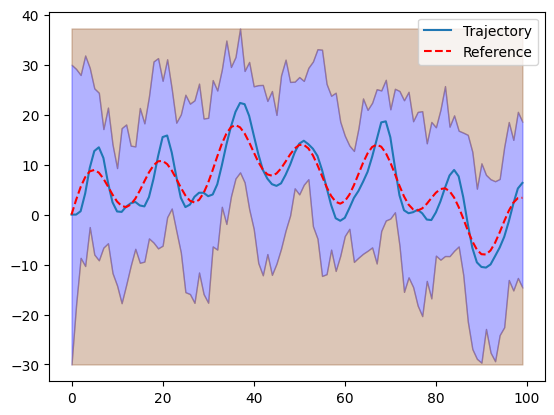

Standard Deviation between trajectory and reference: 2.9976848286423206


In [73]:
print(f"mission.csv")

# Define the gains for the controller
gains = {'Kp': 0.2, 'Ki': 0.0, 'Kd': 0.6}

# Instantiate the controller and submarine
controller = Controller(gains)
sub = Submarine()

# Generate a random mission or load from CSV
# Option 1: Load the mission from the mission.csv file (in current directory)
mission = Mission.from_csv('mission.csv')

# Instantiate the closed loop system
closed_loop = ClosedLoop(sub, controller)

# Simulate the system with random disturbances
variance = 0.5  # You can adjust the variance to see how it affects the disturbances
trajectory = closed_loop.simulate_with_random_disturbances(mission, variance)

# Plot the completed mission including the reference trajectory and submarine trajectory
trajectory.plot_completed_mission(mission)

import numpy as np

def calculate_standard_deviation(trajectory, reference):
    """
    Calculate the standard deviation between the trajectory and reference depths.
    
    Parameters:
    trajectory: Trajectory
        An instance of the Trajectory class, which contains the position of the submarine.
    reference: np.ndarray
        1D array containing the reference depth at each time t.
        
    Returns:
    float
        The standard deviation between the trajectory depth and reference depth.
    """
    # Extract the depth values from the trajectory's position (second column)
    trajectory_depths = trajectory.position[:, 1]  # Access the 'position' attribute
    
    # Ensure we only calculate for t=0 to t=100
    trajectory_depths = trajectory_depths[:101]
    reference_depths = reference[:101]
    
    # Calculate the difference between the trajectory depths and reference depths
    differences = trajectory_depths - reference_depths
    
    # Calculate the standard deviation of the differences
    std_deviation = np.std(differences)
    
    return std_deviation

# Example usage:
# Assuming 'trajectory' is an instance of the Trajectory class and 'mission.reference' is the reference
std_dev = calculate_standard_deviation(trajectory, mission.reference)
print(f"Standard Deviation between trajectory and reference: {std_dev}")


Standard Deviation between trajectory and reference: 3.1377462879716878


random mission


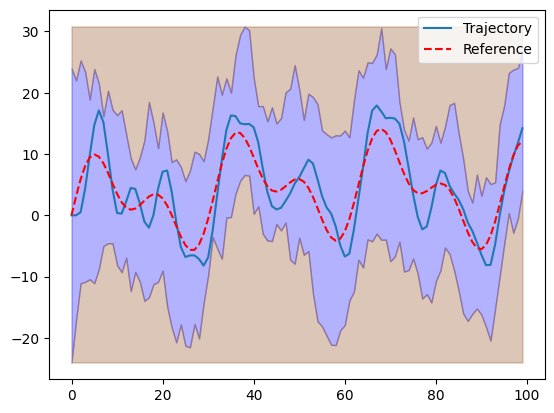

Standard Deviation between trajectory and reference: 3.33087778921977


In [74]:
print("random mission")
# Define the gains for the controller
gains = {'Kp': 0.2, 'Ki': 0.0, 'Kd': 0.6}

# Instantiate the controller and submarine
controller = Controller(gains)
sub = Submarine()

# Option 2: Generate a new random mission 
duration = 100  # You can change this based on your simulation needs
scale = 8.0     # Scaling factor for the mission
mission = Mission.random_mission(duration, scale)
# Instantiate the closed loop system
closed_loop = ClosedLoop(sub, controller)

# Simulate the system with random disturbances
variance = 0.5  # You can adjust the variance to see how it affects the disturbances
trajectory = closed_loop.simulate_with_random_disturbances(mission, variance)

# Plot the completed mission including the reference trajectory and submarine trajectory
trajectory.plot_completed_mission(mission)

import numpy as np

def calculate_standard_deviation(trajectory, reference):
    """
    Calculate the standard deviation between the trajectory and reference depths.
    
    Parameters:
    trajectory: Trajectory
        An instance of the Trajectory class, which contains the position of the submarine.
    reference: np.ndarray
        1D array containing the reference depth at each time t.
        
    Returns:
    float
        The standard deviation between the trajectory depth and reference depth.
    """
    # Extract the depth values from the trajectory's position (second column)
    trajectory_depths = trajectory.position[:, 1]  # Access the 'position' attribute
    
    # Ensure we only calculate for t=0 to t=100
    trajectory_depths = trajectory_depths[:101]
    reference_depths = reference[:101]
    
    # Calculate the difference between the trajectory depths and reference depths
    differences = trajectory_depths - reference_depths
    
    # Calculate the standard deviation of the differences
    std_deviation = np.std(differences)
    
    return std_deviation

# Example usage:
# Assuming 'trajectory' is an instance of the Trajectory class and 'mission.reference' is the reference
std_dev = calculate_standard_deviation(trajectory, mission.reference)
print(f"Standard Deviation between trajectory and reference: {std_dev}")


Standard Deviation between trajectory and reference: 4.083307805683985
